In [9]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import uncertainties 
from uncertainties import ufloat

In [10]:
# Constants and values

L = ufloat(29, 0.1)
S = ufloat(0.112e-3, 1e-6)**2 * np.pi/4
n = 8.5e28
e_0 = 1.6e-19
m_e = 9.1093837e-31 

In [11]:
#Reading data

data = pd.read_excel('FP4_data.xlsx')

print(data)

       t     R
0   21.9  56.7
1   23.3  56.9
2   24.3  57.1
3   25.3  57.2
4   26.5  57.4
5   27.3  57.6
6   28.4  57.8
7   29.7  58.0
8   30.7  58.2
9   31.9  58.3
10  32.7  58.6
11  33.6  58.7
12  35.7  59.1
13  37.0  59.3
14  38.2  59.5
15  39.5  59.8
16  41.6  60.1
17  43.2  60.4
18  44.3  60.6
19  45.3  60.7
20  46.9  61.1
21  47.6  61.2
22  48.6  61.3
23  49.8  61.6
24  50.8  61.8
25  51.8  61.9
26  53.0  62.1
27  54.1  62.3
28  55.2  62.5
29  56.1  62.7
30  57.1  62.9
31  57.9  63.0
32  58.9  63.1
33  59.9  63.3
34  60.8  63.4
35  61.8  63.6


In [12]:
#Creating uncertainties for R and t

R_uns = []
for ii,ID in enumerate(data['R']):
    # print(ii, ID)
    R_uns.append(ufloat(data['R'][ii], 0.))

data['R'] = R_uns

t_uns = [] 
for ii,ID in enumerate(data['t']):
    # print(ii, ID)
    t_uns.append(ufloat(data['t'][ii], 1))

data['t'] = t_uns

In [13]:
#Calculations

data['mu'] = L / (e_0 * n * data['R'] * S)
data['tau'] = data['mu']* m_e / e_0
 
print(data)

             t         R                 mu                  tau
0   21.9+/-1.0  56.7+/-0  0.00382+/-0.00007    (2.17+/-0.04)e-14
1   23.3+/-1.0  56.9+/-0  0.00380+/-0.00007    (2.17+/-0.04)e-14
2   24.3+/-1.0  57.1+/-0  0.00379+/-0.00007    (2.16+/-0.04)e-14
3   25.3+/-1.0  57.2+/-0  0.00378+/-0.00007    (2.15+/-0.04)e-14
4   26.5+/-1.0  57.4+/-0  0.00377+/-0.00007    (2.15+/-0.04)e-14
5   27.3+/-1.0  57.6+/-0  0.00376+/-0.00007    (2.14+/-0.04)e-14
6   28.4+/-1.0  57.8+/-0  0.00374+/-0.00007    (2.13+/-0.04)e-14
7   29.7+/-1.0  58.0+/-0  0.00373+/-0.00007    (2.12+/-0.04)e-14
8   30.7+/-1.0  58.2+/-0  0.00372+/-0.00007    (2.12+/-0.04)e-14
9   31.9+/-1.0  58.3+/-0  0.00371+/-0.00007    (2.11+/-0.04)e-14
10  32.7+/-1.0  58.6+/-0  0.00369+/-0.00007    (2.10+/-0.04)e-14
11  33.6+/-1.0  58.7+/-0  0.00369+/-0.00007    (2.10+/-0.04)e-14
12  35.7+/-1.0  59.1+/-0  0.00366+/-0.00007    (2.09+/-0.04)e-14
13  37.0+/-1.0  59.3+/-0  0.00365+/-0.00007    (2.08+/-0.04)e-14
14  38.2+/-1.0  59.5+/-0 

In [14]:
#Linear fitting

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(data['t'].apply(lambda x: x.nominal_value), data['tau'].apply(lambda x: x.nominal_value)*10**14)
print('slope: ', slope)

# Create the best-fit line
best_fit_line = slope * np.array(data['t'].apply(lambda x: x.nominal_value)) + intercept

slope:  -0.005987036671922805


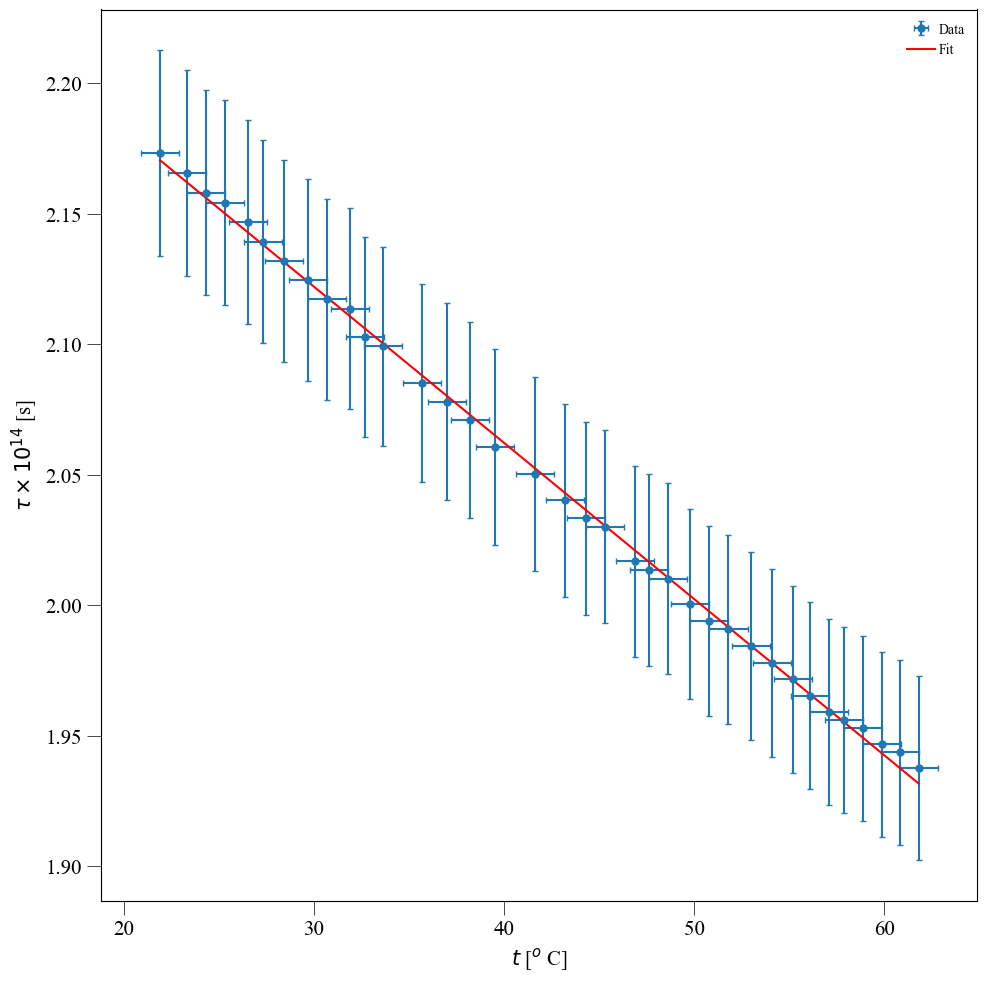

In [15]:
# Plot the data and the best-fit line

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$t$ [$^o$ C]")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel(r"$\tau \times 10^{14}$ [s]")
ax.yaxis.label.set_fontsize(15)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.errorbar(data['t'].apply(lambda x: x.nominal_value), data['tau'].apply(lambda x: x.nominal_value)*10**14, xerr=data['t'].apply(lambda x: x.std_dev), yerr=data['tau'].apply(lambda x: x.std_dev)*10**14, fmt='o', color=colors[5], ecolor=colors[5], markersize=5, capsize=2, label='Data')
ax.plot(data['t'].apply(lambda x: x.nominal_value), best_fit_line, color='r', label='Fit')

handles, labels = ax.get_legend_handles_labels()
order = [1, 0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(0.068, 1.0),
		  fontsize=10, ncol=1, handletextpad=0.3)


plt.show() 

# fig.savefig('tau.png', bbox_inches='tight')